## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Loading Dataset

In [36]:
# importing dataset using pandas
data = pd.read_csv("E:/DOWNLOADS/city_day.csv")
print(data.shape)
data.head()

(29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## Exploratory Data Analysis

In [38]:
import plotly.express as px

plot1 = px.scatter(data , x = "City", y = "AQI")

plot1.show()

From above graph we can see that Air Quality Index are high in Ahmedabad city. Almost 3 times the value of other cities. On Average, Aizwal has been the city with the best AQI and Delhi, Ahmedabad, Lucknow have very poor AQ-indices.

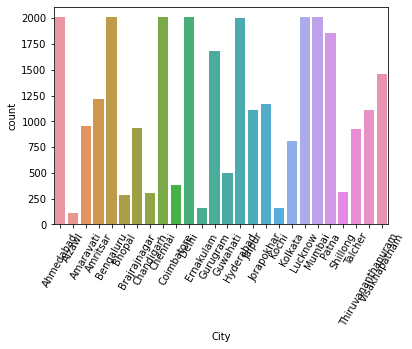

In [39]:
import seaborn as sns
sns.countplot(x=data['City'])
plt.xticks(rotation=60)
plt.show()

Most of the records in our dataet are from ahmedabad, Chandigarh, Amritsar, Mumbai etc as we can see in the count plot.

## Data PreProcessing

In [3]:
data.info()     # Checking data types of the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
cols = data.columns  # Listing all column names.
print(cols)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [5]:
num_cols = data._get_numeric_data().columns       # Listing all numerical columns.
print(num_cols)

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


In [6]:
# Listing categorical Column
categorical_colums = list(set(cols) - set(num_cols))
categorical_colums

['Date', 'AQI_Bucket', 'City']

Checking Null Values

In [7]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
# Dropping Null Values from Our Target Feature.
data = data.dropna(subset=['AQI'])

In [9]:
data.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

Now filling null values from the average mean of the column. So that distribution of thecolumn dont get disturbed.

In [10]:
data['PM2.5'].fillna(int(data['PM2.5'].mean()), inplace=True)
data['PM10'].fillna(int(data['PM10'].mean()), inplace=True)
data['NO'].fillna(int(data['NO'].mean()), inplace=True)
data['NO2'].fillna(int(data['NO2'].mean()), inplace=True)
data['NOx'].fillna(int(data['NOx'].mean()), inplace=True)
data['NH3'].fillna(int(data['NH3'].mean()), inplace=True)
data['CO'].fillna(int(data['CO'].mean()), inplace=True)
data['SO2'].fillna(int(data['SO2'].mean()), inplace=True)
data['O3'].fillna(int(data['O3'].mean()), inplace=True)
data['Benzene'].fillna(int(data['Benzene'].mean()), inplace=True)
data['Toluene'].fillna(int(data['Toluene'].mean()), inplace=True)
data['Xylene'].fillna(int(data['Xylene'].mean()), inplace=True)

Now our null values are resolved.

In [11]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [12]:
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

Converting categorical column 'city' into Numerical by performing label encoding on it.

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['City'] = le.fit_transform(data['City'].values)

In [14]:
data['City'] = le.fit_transform(data['City'])

In [15]:
data['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

Dropping irrelavant and unimportant features.

In [16]:
data.drop('AQI_Bucket',axis=1,inplace=True)
data.drop('Date',axis=1,inplace=True)

NoW we can see all our variables are converted into numerical columns.

In [17]:
data.dtypes

City         int64
PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
dtype: object

<AxesSubplot:>

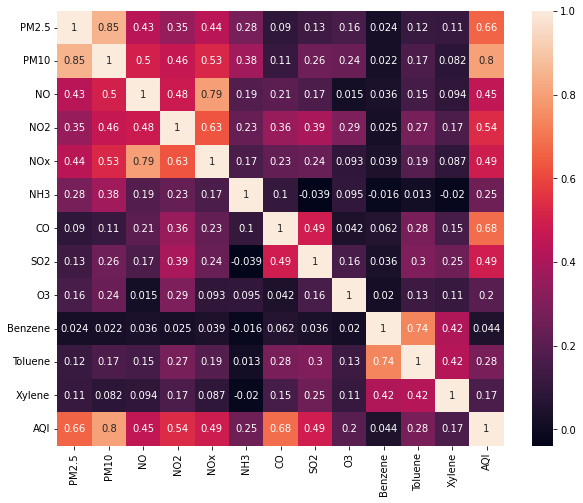

In [47]:
corr = data.corr()

# Plot the correlation matrix using seaborn's heatmap function
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

- If the value is close to 1, it indicates a strong positive correlation between the variables. This means that as one variable increases, the other variable is likely to increase as well.

- If the value is close to -1, it indicates a strong negative correlation between the variables. This means that as one variable increases, the other variable is likely to decrease.

- If the value is close to 0, it indicates a weak or no correlation between the variables. This means that there is no clear relationship between the variables.

So from the correlation matrix we examine that 'CO', 'PM2.5' and 'PM10' are the features which are highly correlated without target feature. Benzene is the least contributing feature in the prediction of Air Quality. There is weak corelation but no Negative correlation exist in the data.

## Task 1  : Regression Analysis

Now we are doing regression analysis to predict the air quality index from the dataset. Models which we are using are Decison tree regressor, Linear regression and random forest regressors.

### Splitting Dataset into Train and Test Set

In [18]:
X = data.loc[:, data.columns != 'AQI']     # Independent Variables.
y = data[['AQI']]   # Target Variable

In [19]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
trainX = trainX.reset_index(drop=True)
testX = testX.reset_index(drop=True)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(17395, 13)
(17395, 1)
(7455, 13)
(7455, 1)


### Applying Machine Learning Algorithms

### Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=20)
DT.fit(trainX, trainy)
Y_test_pred = DT.predict(testX)

print("R Square Score",DT.score(testX,testy))

print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.7885859539357932
Adjusted R Square 0.9933972134195006
Mean squared error: 4384.02
Coefficient of determination: 0.789


### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

plr = LinearRegression().fit(trainX,trainy)
Y_test_pred = plr.predict(testX)

print("R Square Score",plr.score(testX,testy))
print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.8574716399018907
Adjusted R Square 0.9933972134195006
Mean squared error: 2955.56
Coefficient of determination: 0.857


### Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(trainX,trainy)
Y_test_pred = rf.predict(testX)

print("R Square Score",plr.score(testX,testy))
print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.8574716399018907
Adjusted R Square 0.9933972134195006
Mean squared error: 2322.44
Coefficient of determination: 0.888


## Task 2 : Dimensionality Reduction Technique

Now we are performing dimensionality reduction on the same dataset and checking out the difference in the results.

In [23]:
X = data.loc[:, data.columns != 'AQI']
y = data[['AQI']]

In [24]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler model
scaler = StandardScaler()

# fit and transform the data
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)
X_scaled.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-1.702252,0.251840,-0.004294,-0.480219,-0.010355,0.049169,-0.028143,0.654762,2.042752,1.164150,-0.227133,-0.514612,-0.020218
1,-1.702252,0.198953,-0.004294,-0.169145,-0.011583,0.298302,-0.028143,1.641701,1.982921,2.910135,-0.225786,-0.514612,0.379216
2,-1.702252,0.434936,-0.004294,0.304658,0.151316,0.688588,-0.028143,3.144929,3.080803,3.577456,-0.212320,-0.514065,1.063275
3,-1.702252,1.101573,-0.004294,1.162807,0.536870,1.770420,-0.028143,5.867568,3.536221,3.173600,-0.201547,-0.512423,5.416381
4,-1.702252,1.782196,-0.004294,1.660884,0.259779,1.372011,-0.028143,7.447812,2.363404,3.392609,-0.197507,-0.511328,7.746010


### Principal Component Analysis Technique (PCA)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

principalComponents = pca.fit_transform(X_scaled)

PCA_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8'])

In [27]:
trainX, testX, trainy, testy = train_test_split(PCA_Df, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(17395, 8)
(17395, 1)
(7455, 8)
(7455, 1)


### Applying Algorithm on Dimensionally Reduced Data.

In [28]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=20)
DT.fit(trainX, trainy)
Y_test_pred = DT.predict(testX)

print("R Square Score",DT.score(testX,testy))

print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.7813451701701595
Adjusted R Square 0.9983695499284772
Mean squared error: 4534.17
Coefficient of determination: 0.781


In [29]:
from sklearn.linear_model import LinearRegression

plr = LinearRegression().fit(trainX,trainy)
Y_test_pred = plr.predict(testX)

print("R Square Score",plr.score(testX,testy))
print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.7488384452670023
Adjusted R Square 0.9983695499284772
Mean squared error: 5208.25
Coefficient of determination: 0.749


In [30]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(trainX,trainy)
Y_test_pred = rf.predict(testX)

print("R Square Score",plr.score(testX,testy))
print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.7488384452670023
Adjusted R Square 0.9983695499284772
Mean squared error: 2611.42
Coefficient of determination: 0.874


## Singular Vector Decomposition Technique

In [31]:
from sklearn.decomposition import TruncatedSVD

# create a SVD model
svd = TruncatedSVD(n_components=8)

# fit and transform the data
X_reduced = svd.fit_transform(X_scaled)

In [32]:
trainX, testX, trainy, testy = train_test_split(X_reduced, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(17395, 8)
(17395, 1)
(7455, 8)
(7455, 1)


### Applying Algorithm on Dimensionally Reduced Data.

In [33]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=20)
DT.fit(trainX, trainy)
Y_test_pred = DT.predict(testX)

print("R Square Score",DT.score(testX,testy))

print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.7701472388088666
Adjusted R Square 0.9983728656553655
Mean squared error: 4766.37
Coefficient of determination: 0.770


In [34]:
from sklearn.linear_model import LinearRegression

plr = LinearRegression().fit(trainX,trainy)
Y_test_pred = plr.predict(testX)

print("R Square Score",plr.score(testX,testy))
print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.7488384452670027
Adjusted R Square 0.9983728656553655
Mean squared error: 5208.25
Coefficient of determination: 0.749


In [35]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(trainX,trainy)
Y_test_pred = rf.predict(testX)

print("R Square Score",plr.score(testX,testy))
print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.7488384452670027
Adjusted R Square 0.9983728656553655
Mean squared error: 2611.42
Coefficient of determination: 0.874
